In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import scipy.special
from scipy.stats import beta

In [2]:
df = pd.read_csv('pvdata2.csv')
df

,Year,Month,Day,Hour,Irridiance,Temp
0,2016,3,1,6,15.95,20.54
1,2016,3,1,7,154.23,22.39
2,2016,3,1,8,361.21,25.30
3,2016,3,1,9,562.18,29.39
4,2016,3,1,10,734.61,31.38
...,...,...,...,...,...,...
43195,2021,2,1,1,0.00,9.52
43196,2021,2,1,2,0.00,9.31
43197,2021,2,1,3,0.00,9.21
43198,2021,2,1,4,0.00,9.37


In [3]:
df_irridiance=df['Irridiance']
df_tem=df['Temp']

In [4]:
df_irridiance
array_irr = df_irridiance.values
array_temp = df_tem.values
len(array_temp)

43200

In [5]:
# Irridiance Season Grouping
season1 = np.array([])
season2 = np.array([])
season3 = np.array([])
season4 = np.array([])

for i in range(5):
    season1=np.append(season1, array_irr[i*8640:i*8640+2160])
    season2=np.append(season2, array_irr[i*8640+2160:i*8640+4320])
    season3=np.append(season3, array_irr[i*8640+4320:i*8640+6480])
    season4=np.append(season4, array_irr[i*8640+6480:i*8640+8640])

print(season1)
print(len(season2))
print(len(season3))
print(len(season4))

[ 15.95 154.23 361.21 ...   0.     0.    20.99]
10800
10800
10800


In [6]:
lst_irr1=list()
for i in range(24):
    a=np.array([])
    for j in range(i,len(season1),24):
        a = np.append(a, season1[j])
    lst_irr1.append(a/1000)

In [7]:
lst_irr2=list()
for i in range(24):
    a=np.array([])
    for j in range(i,len(season2),24):
        a = np.append(a, season2[j])
    lst_irr2.append(a/1000)

In [8]:
lst_irr3=list()
for i in range(24):
    a=np.array([])
    for j in range(i,len(season2),24):
        a = np.append(a, season3[j])
    lst_irr3.append(a/1000)

In [9]:
lst_irr4=list()
for i in range(24):
    a=np.array([])
    for j in range(i,len(season4),24):
        a = np.append(a, season4[j])
    lst_irr4.append(a/1000)

In [10]:
def Beta(alpha, beta, s):
    B=(scipy.special.gamma(alpha)*scipy.special.gamma(beta))/scipy.special.gamma(alpha+beta);
    return (1/B)*(s**(alpha-1))*((1-s)**(beta-1))

def weibull(k,c,v):
    return (k/c)*((v/c)**(k-1))*np.exp(-(v/c)**k)
def weibull_cdf(k,c,v):
    return 1-np.exp(-(v/c)**k)

In [19]:
from scipy.stats import beta
# Plots the PDF
def plot_pdf(slot, se):
    mean=0;
    std_dev=0;
    shuffle=100
    if se==1:
        b=lst_irr1[slot]
    elif se==2:
        b=lst_irr2[slot]
    elif se==3:
        b=lst_irr3[slot]
    elif se==4:
        b=lst_irr4[slot]

    for j in range(shuffle):
        # Set a random seed for reproducibility

        # Take 350 random samples from the data
        random_samples = np.random.choice(b, size=350, replace=False)

        # Calculate mean and standard deviation of the random samples
        mean = mean+np.mean(random_samples)
        std_dev = std_dev+np.std(random_samples)

    mu=mean/shuffle
    std=std_dev/shuffle
    print(f'\n\nMean               {mu}')
    print(f'Standard Deviation {std}')



    # alpha beta calculation
    v = ((mu*(1-mu))/(std**2))-1
    alphaa = mu*v
    betaa = (1-mu)*v

    print(f'beta_value         {betaa}')
    print(f'alpha_value        {alphaa}')

    # Generate beta distribution
    x = b
    x.sort() # Range of x values
    pdf = beta.pdf(x,alphaa,betaa)
      # Probability density function

    # Plotting
    plt.plot(x, pdf, 'r-', lw=2, label='Beta Distribution')
    plt.hist(x, bins=8, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Histogram')
    plt.title('Beta Distribution')
    plt.xlabel('Solar Irridiance')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
def solar_out(se,Ta,slot): 
    if se==1:
        b1 = lst_irr1[slot]
    elif se==2:
        b1 = lst_irr2[slot]
    elif se==3:
        b1 = lst_irr3[slot]
    else:
        b1 = lst_irr4[slot]
        
    mean=0;
    std_dev=0;
    shuffle=100
    for j in range(shuffle):
        # Take 350 random samples from the data
        random_samples = np.random.choice(b1, size=350, replace=False)

        # Calculate mean and standard deviation of the random samples
        mean = mean+np.mean(random_samples)
        std_dev = std_dev+np.std(random_samples)

    mu=mean/shuffle
    std=std_dev/shuffle
    # alpha beta calculation
    v = ((mu*(1-mu))/(std**2))-1
    alphaa = mu*v
    betaa = (1-mu)*v
    
    s, unique_indices = np.unique(b1, return_index=True)
    s=np.array(s)
    s_arr = np.arange(0,1,0.001)
    output=0;
    for s_now in s_arr:
        Ta=30.76
        # SLP280-20D
        P_rated=280
        Vmpp=28.36
        Impp=7.76
        Voc=36.96
        Isc=8.38
        kv=0.1278
        ki=0.00545
        N_OT=43;
        Nm=round(30000000/P_rated);

        T_cy=Ta + s_now*((N_OT-20)/0.8)

        Iy=s_now*(Isc+ki*(T_cy-25))
        Vy=Voc-kv*T_cy
        FF=(Vmpp*Impp)/(Voc*Isc)
        Pos=Nm*FF*Vy*Iy
        Fps = beta.pdf(s_now, alphaa, betaa)
        output=output+(Fps*Pos*0.001)/(1000000)
    print(f'Output Power-                 {output}')
    print(f'minimum irradiance-           {min(s)}')
    print(f'maximum irradiance-           {max(s)}')

Output Power-                 5.826097469194738
minimum irradiance-           0.04065
maximum irradiance-           0.49491


Mean               0.28390183771428573
Standard Deviation 0.08866011693666666
beta_value         17.80457307613393
alpha_value        7.058740382601251


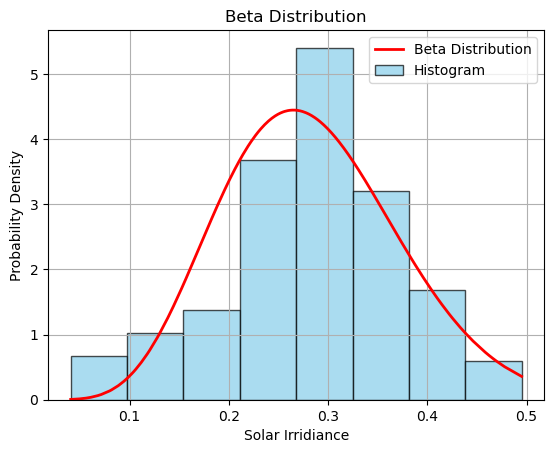

In [21]:
Time_slot = 9

season = 3


Ambinet_Temperature = 28


solar_out(season,Ambinet_Temperature,Time_slot)

plot_pdf(slot=Time_slot, se=season)

In [ ]:
# from scipy.stats import beta
# # Plots the PDF
# def plot_Weibull_pdf(slot, se):
#     mean=0;
#     std_dev=0;
#     shuffle=100
#     if se==1:
#         b=lst_irr1[slot]
#     elif se==2:
#         b=lst_irr2[slot]
#     elif se==3:
#         b=lst_irr3[slot]
#     elif se==4:
#         b=lst_irr4[slot]

#     for j in range(shuffle):
#         # Set a random seed for reproducibility

#         # Take 350 random samples from the data
#         random_samples = np.random.choice(b, size=350, replace=False)

#         # Calculate mean and standard deviation of the random samples
#         mean = mean+np.mean(random_samples)
#         std_dev = std_dev+np.std(random_samples)

#     mu=mean/shuffle
#     std=std_dev/shuffle
#     print(f'\n\nMean               {mu}')
#     print(f'Standard Deviation {std}')



#     k=(std/mu)**(-1.086)
#     # k=2
#     c=mu/scipy.special.gamma(1+1/k)

#     print(f'k                  {k}')
#     print(f'c                  {c}')


#     shape = k  # Shape parameter (also known as k)
#     scale = c  # Scale parameter (also known as lambda)

#     # Generate beta distribution
#     x = b
#     x.sort() # Range of x values
#     pdf = weibull(shape, scale,x)  # Probability density function
#       # Probability density function

#     # Plotting
#     plt.plot(x, pdf, 'r-', lw=2, label='Weibull Distribution')
#     plt.hist(x, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Histogram')
#     plt.title('Weibull Distribution')
#     plt.xlabel('Solar Irridiance')
#     plt.ylabel('Probability Density')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [ ]:
# plot_Weibull_pdf(7, season)

In [ ]:
# plot_pdf(7,season)

In [ ]:
def calculate_alpha_beta(s):
    mean=0;
    std_dev=0;
    for j in range(8):
        random_samples = np.random.choice(s, size=350, replace=False)

        # Calculate mean and standard deviation of the random samples
        mean = mean+np.mean(random_samples)
        std_dev = std_dev+np.std(random_samples)

    mu=mean/8
    std=std_dev/8
    # alpha beta calculation
    v = ((mu*(1-mu))/(std**2))-1
    alphaa = mu*v
    betaa = (1-mu)*v
    
    return alphaa,betaa    

In [ ]:
power_generation = []  # Initialize empty list before the loop

for i in range(0, 11):
    s = lst_irr1[i]
    alphaa, betaa = calculate_alpha_beta(s)
    s_arr = np.arange(0,1,0.001)
    output=0;
    for s_now in s_arr:
        Ta=30.76
        # SLP280-20D
        P_rated=280
        Vmpp=28.36
        Impp=7.76
        Voc=36.96
        Isc=8.38
        kv=0.1278
        ki=0.00545
        N_OT=43;
        Nm=round(30000000/P_rated);

        T_cy=Ta + s_now*((N_OT-20)/0.8)

        Iy=s_now*(Isc+ki*(T_cy-25))
        Vy=Voc-kv*T_cy
        FF=(Vmpp*Impp)/(Voc*Isc)
        Pos=Nm*FF*Vy*Iy
        Fps = beta.pdf(s_now, alphaa, betaa)
        output=output+(Fps*Pos*0.001)/(1000000)
    power_generation.append(output)    
    
power_generation = np.array(power_generation)  # Convert list to NumPy array
print(power_generation)
plt.plot(power_generation)
plt.title('Power Generation at differnt hours of the day')
plt.xlabel('Hour')
plt.ylabel('Power Generation (MW)')
plt.grid(True)
plt.show()

In [ ]:
power_generation = []  # Initialize empty list before the loop
slot=7
season = ['summer' 'monsoon' 'fall' 'winter']

for se in range(1,5):
    if se==1:
        s = lst_irr1[slot]
    elif se==2:
        s = lst_irr2[slot]
    elif se==3:
        s = lst_irr3[slot]
    else:
        s = lst_irr4[slot]
    alphaa, betaa = calculate_alpha_beta(s)
    s_arr = np.arange(0,1,0.001)
    output=0;
    for s_now in s_arr:
        Ta=30.76
        # SLP280-20D
        P_rated=280
        Vmpp=28.36
        Impp=7.76
        Voc=36.96
        Isc=8.38
        kv=0.1278
        ki=0.00545
        N_OT=43;
        Nm=round(30000000/P_rated);

        T_cy=Ta + s_now*((N_OT-20)/0.8)

        Iy=s_now*(Isc+ki*(T_cy-25))
        Vy=Voc-kv*T_cy
        FF=(Vmpp*Impp)/(Voc*Isc)
        Pos=Nm*FF*Vy*Iy
        Fps = beta.pdf(s_now, alphaa, betaa)
        output=output+(Fps*Pos*0.001)/(1000000)
    power_generation.append(output)    

power_generation = np.array(power_generation)  # Convert list to NumPy array
print(power_generation)
plt.stem(power_generation)
plt.title('Power Generation at differnt Season')
plt.xlabel('Hour')
plt.ylabel('Power Generation')
plt.grid(True)
plt.show()